# Regressão com uma Dense Neural Network (DNN)

### Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Definindo o dataset

In [2]:
x = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

### Definindo a rede neural densa

O código abaixo uma rede neural densa com um neurônio e entrada com uma dimensão.

Para mais informações sobre as classes e funções do TF, acesse: https://www.tensorflow.org/api_docs

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

### Imprimindo um resumo da arquitetura do modelo

+ O método `summary` imprime uma **descrição da arquitetura do modelo**, mostrando a disposição das camadas e o número total de parâmetros treináveis e não treináveis.
    + Parâmetros não treináveis são aqueles que **não são atualizados durante o treinamento do modelo**, ou seja, permanecem constantes.
    + Por exemplo, camadas de normalização de *batch* usam valores de média e variância dos dados de entrada para normalizá-los. Esses parâmetros são calculados e não são **otimizados**
<br/><br/>

+ Ele exibe as seguintes informações:
    + O nome de cada camada (que é gerado automaticamente, a menos o definamos ao criar a camada com o parâmetro `name`), 
    + Seu formato de saída (`None` significa que o tamanho do mini-batch pode ser qualquer um) e 
    + Seu número de parâmetros.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Inspecionando os pesos iniciais do modelo

A inicialização dos pesos é **crucial para o bom treinamento de um modelo**, pois ela

+ **Acelera a convergência** (i.e., o aprendizado do modelo),
+ Mitiga problemas de **explosão e desaparecimento** do gradiente.
    + Explosão: os gradientes se tornam tão grandes e, consequentemente, os pesos também, levando a divergência do modelo.
    + Desaparecimento: os gradientes se tornam extremamente pequenos e, consequentemente, as atualizações dos pesos também, resultando em treinamento (i.e., aprendizado) lento ou mesmo estagnação.
<br/><br/>

**Por padrão**, os pesos do modelo são inicializados pela classe `Dense` da seguinte forma:

+ O parâmetro `kernel_initializer` define como os pesos sinápticos ($w$) são inicializados => Por padrão, usa-se a inicialização `glorot_uniform` (também chamada de **Xavier**)
   + Incializa-se os pesos usando amostras retiradas de uma **distribuição uniforme** com limites: `[-limit, limit]`, onde
   $$\text{limit} = \sqrt{\frac{6}{(\text{fan}_{\text{in}} + \text{fan}_{\text{out}})}}$$
   + $\text{fan}_{\text{in}}$ é igual ao número de neurônios da camada anterior.
   + $\text{fan}_{\text{out}}$ é igual ao número de neurônios nessa camada sendo configurada.

+ O parâmetro `bias_initializer` define como os pesos de bias ($b$) são inicializados => Por padrão, todos os valores inciais dos pesos de bias são zerados (`zeros`).


Existem outras formas de se inicializar os pesos, para mais informações, acesse: [Initializers](https://keras.io/api/layers/initializers/)

In [5]:
# Retorna uma lista com todos os pesos.
model.get_weights()

[array([[-0.7811561]], dtype=float32), array([0.], dtype=float32)]

#### Acessando o peso sináptico e o de bias do modelo

In [6]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  -0.7811561
b  =  0.0


### Compilando o modelo

Usamos como **otimizador** o gradiente descendente estocástico (SGD) e como **função de erro** o erro quadrático médio.

**OBS**.: 

+ O valor do passo de aprendizagem do SGD é o valor padrão da classe, que é igual a $0.01$. 

+ Para alterar esse valor, precisamos instanciar um objeto da classe SGD e passar o novo valor para seu construtor através do parâmetro `learning_rate`. 

+ Isso é válido para qualquer outro otimizador da biblioteca TensorFlow.

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### Fazendo uma predição com o modelo inicial.

Sabemos das aulas anteriores que a melhor função hipótese é dada por $\hat{y} = -1 + 2x$, assim, quando $x=10$, o valor de $\hat{y}$ deveria ser 19.

In [8]:
print(model.predict([10.0]))

1/1 [==============================] - 1s 674ms/step
[[-7.811561]]


### Treinando o modelo

In [9]:
# Ajusta o modelo aos dados (também conhecido como treinar o modelo)
history = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 178ms/step - loss: 32.6198
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 25.9879
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 20.7636
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 16.6469
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 13.4016
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 10.8422
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 8.8224
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 7.2273
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9665
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 4.9688
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 4.1782
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 3.5507
Epoch 13/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.1984
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 106/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1903
Epoch 107/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1864
Epoch 108/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1826
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 110/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1752
Epoch 111/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1716
Epoch 112/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 113/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1646
Epoch 114/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1612
Epoch 115/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 116/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 208/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 210/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 211/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 212/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 213/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 214/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 215/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 216/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 217/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 309/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 310/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 311/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 312/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 313/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 314/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 315/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 316/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 317/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 318/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 319/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 320/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 3.6096e-04
Epoch 409/500
1/1 [==============================] - 0s 3ms/step - loss: 3.5355e-04
Epoch 410/500
1/1 [==============================] - 0s 2ms/step - loss: 3.4628e-04
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 3.3917e-04
Epoch 412/500
1/1 [==============================] - 0s 3ms/step - loss: 3.3220e-04
Epoch 413/500
1/1 [==============================] - 0s 3ms/step - loss: 3.2538e-04
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 3.1870e-04
Epoch 415/500
1/1 [==============================] - 0s 2ms/step - loss: 3.1215e-04
Epoch 416/500
1/1 [==============================] - 0s 3ms/step - loss: 3.0574e-04
Epoch 417/500
1/1 [==============================] - 0s 3ms/step - loss: 2.9946e-04
Epoch 418/500
1/1 [==============================] - 0s 2ms/step - loss: 2.9331e-04
Epoch 419/500
1/1 [==============================] - 0s 3ms/step - loss: 2.8728e-04
Epoch 

**Observações**

+ Vejam que o erro diminiu a cada nova iteração.
+ Cada iteração leva cerca de 2/3 [ms].
+ Caso o método `fit` seja executado novamente, o treinamento continua de onde ele parou durante a última chamada do método. Isso significa que o modelo aprende a partir da última atualização dos pesos. 

### Testando o modelo

Prevendo a saída de um novo dado (inédito) de entrada (também conhecido como **inferência**).

In [10]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 28ms/step
[[18.978662]]


### Por que o valor não é exatamente 19? O que pode ser feito?

### Inspecionando os pesos do modelo treinado

Sabemos que a melhor função hipótese é dada por $\hat{y} = -1 + 2x$, onde $b=-1$ e $w=2$.

In [11]:
print("w = ", model.get_weights()[0][0,0])
print("b  = ", model.get_weights()[1][0])

w =  1.9969075
b  =  -0.9904123


### Plotando o histórico de erros ao longo das épocas de treinamento

O objeto da classe `History` possui um atributo chamado de `history`, que é um **dicionário** com os valores do erro ao longo das épocas de treinamento.

Esse dicionário pode conter outras medidas feitas longo do treinamento do modelo, para isso, basta especificar a métrica que se quer medir através do parâmetro `metrics` do método `compile()`.

In [12]:
type(history.history)

dict

In [13]:
history.history.keys()

dict_keys(['loss'])

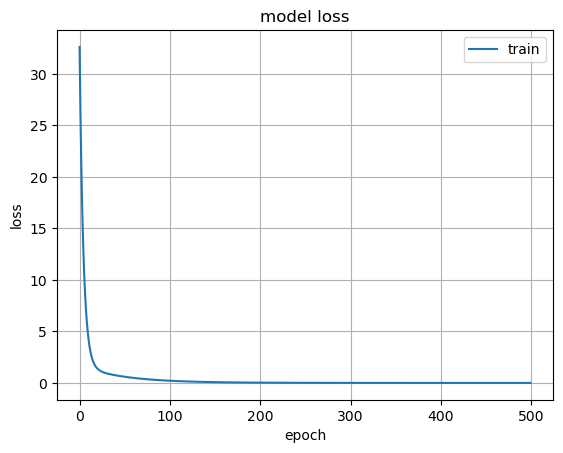

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.grid()
plt.show()

### Comparando os dados originais com a função hipótese

1/1 [==============================] - 0s 15ms/step


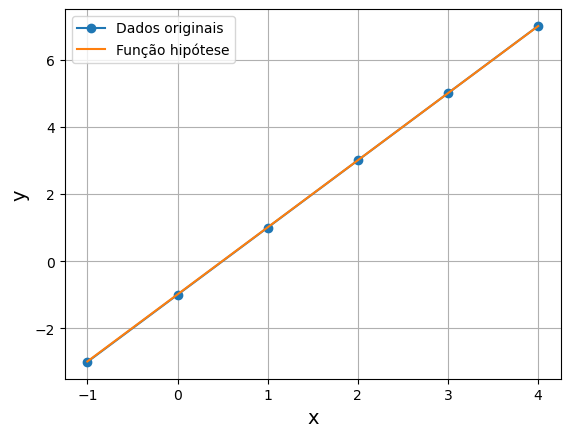

In [15]:
plt.plot(x, y, marker='o', label='Dados originais')
plt.plot(x, model.predict(x), label='Função hipótese')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Salvando o modelo treinado

Os modelos podem ser salvos usando-se três possíveis formatos 
+ .keras (formato nativo, mais recente e eficiente)
+ .h5 (formato legado, Hierarchical Data Format version 5 - HDF5).
+ .tf (formato legado, SavedModel)
<br/>

O método `save()` salva
+ Os valores de peso
+ A arquitetura do modelo
+ A configuração de treinamento do modelo (o que você passa para o método `compile()`)
+ O otimizador e seu estado, se houver (isso permite reiniciar o treinamento de onde ele parou)

In [19]:
model.save('my_first_trained_dnn.keras')

### Inspecionando o modelo salvo de forma visual

Podemos inspecionar o modelo salvo de forma visual usando a aplicação web chamada de [Netron](https://netron.app)

### Carregando um modelo salvo

Para carregar um modelo treinando, usamos a função `load_model()`.

In [17]:
loaded_model = tf.keras.models.load_model('my_first_trained_dnn.keras')

### Continuando o treinamento de um modelo salvo de onde ele parou

In [18]:
loaded_model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 84ms/step - loss: 5.2386e-05
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 5.1310e-05
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 5.0256e-05
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 4.9224e-05
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 4.8213e-05
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 4.7223e-05
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 4.6252e-05
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 4.5302e-05
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 4.4372e-05
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 4.3461e-05
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 4.2567e-05
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1694e-05
Epoch 13/500

1/1 [==============================] - 0s 3ms/step - loss: 6.8529e-06
Epoch 100/500
1/1 [==============================] - 0s 2ms/step - loss: 6.7125e-06
Epoch 101/500
1/1 [==============================] - 0s 2ms/step - loss: 6.5744e-06
Epoch 102/500
1/1 [==============================] - 0s 4ms/step - loss: 6.4396e-06
Epoch 103/500
1/1 [==============================] - 0s 3ms/step - loss: 6.3071e-06
Epoch 104/500
1/1 [==============================] - 0s 3ms/step - loss: 6.1779e-06
Epoch 105/500
1/1 [==============================] - 0s 3ms/step - loss: 6.0507e-06
Epoch 106/500
1/1 [==============================] - 0s 4ms/step - loss: 5.9268e-06
Epoch 107/500
1/1 [==============================] - 0s 3ms/step - loss: 5.8050e-06
Epoch 108/500
1/1 [==============================] - 0s 3ms/step - loss: 5.6855e-06
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: 5.5687e-06
Epoch 110/500
1/1 [==============================] - 0s 4ms/step - loss: 5.4547e-06
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 9.1525e-07
Epoch 197/500
1/1 [==============================] - 0s 3ms/step - loss: 8.9652e-07
Epoch 198/500
1/1 [==============================] - 0s 3ms/step - loss: 8.7811e-07
Epoch 199/500
1/1 [==============================] - 0s 2ms/step - loss: 8.5994e-07
Epoch 200/500
1/1 [==============================] - 0s 3ms/step - loss: 8.4227e-07
Epoch 201/500
1/1 [==============================] - 0s 3ms/step - loss: 8.2494e-07
Epoch 202/500
1/1 [==============================] - 0s 3ms/step - loss: 8.0813e-07
Epoch 203/500
1/1 [==============================] - 0s 3ms/step - loss: 7.9160e-07
Epoch 204/500
1/1 [==============================] - 0s 3ms/step - loss: 7.7525e-07
Epoch 205/500
1/1 [==============================] - 0s 3ms/step - loss: 7.5928e-07
Epoch 206/500
1/1 [==============================] - 0s 3ms/step - loss: 7.4369e-07
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 7.2849e-07
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 1.2222e-07
Epoch 294/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1968e-07
Epoch 295/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1726e-07
Epoch 296/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1485e-07
Epoch 297/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1243e-07
Epoch 298/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1016e-07
Epoch 299/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0791e-07
Epoch 300/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0568e-07
Epoch 301/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0350e-07
Epoch 302/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0140e-07
Epoch 303/500
1/1 [==============================] - 0s 3ms/step - loss: 9.9327e-08
Epoch 304/500
1/1 [==============================] - 0s 2ms/step - loss: 9.7291e-08
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 1.6354e-08
Epoch 391/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6010e-08
Epoch 392/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5676e-08
Epoch 393/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5346e-08
Epoch 394/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5037e-08
Epoch 395/500
1/1 [==============================] - 0s 3ms/step - loss: 1.4741e-08
Epoch 396/500
1/1 [==============================] - 0s 3ms/step - loss: 1.4432e-08
Epoch 397/500
1/1 [==============================] - 0s 2ms/step - loss: 1.4142e-08
Epoch 398/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3853e-08
Epoch 399/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3561e-08
Epoch 400/500
1/1 [==============================] - 0s 2ms/step - loss: 1.3279e-08
Epoch 401/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3024e-08
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 2.2102e-09
Epoch 488/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1639e-09
Epoch 489/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1136e-09
Epoch 490/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0683e-09
Epoch 491/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0298e-09
Epoch 492/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9843e-09
Epoch 493/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9467e-09
Epoch 494/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9111e-09
Epoch 495/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8651e-09
Epoch 496/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8305e-09
Epoch 497/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7922e-09
Epoch 498/500
1/1 [==============================] - 0s 3ms/step - loss: 1.7581e-09
Epoch 